# Group 19 PS 6

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

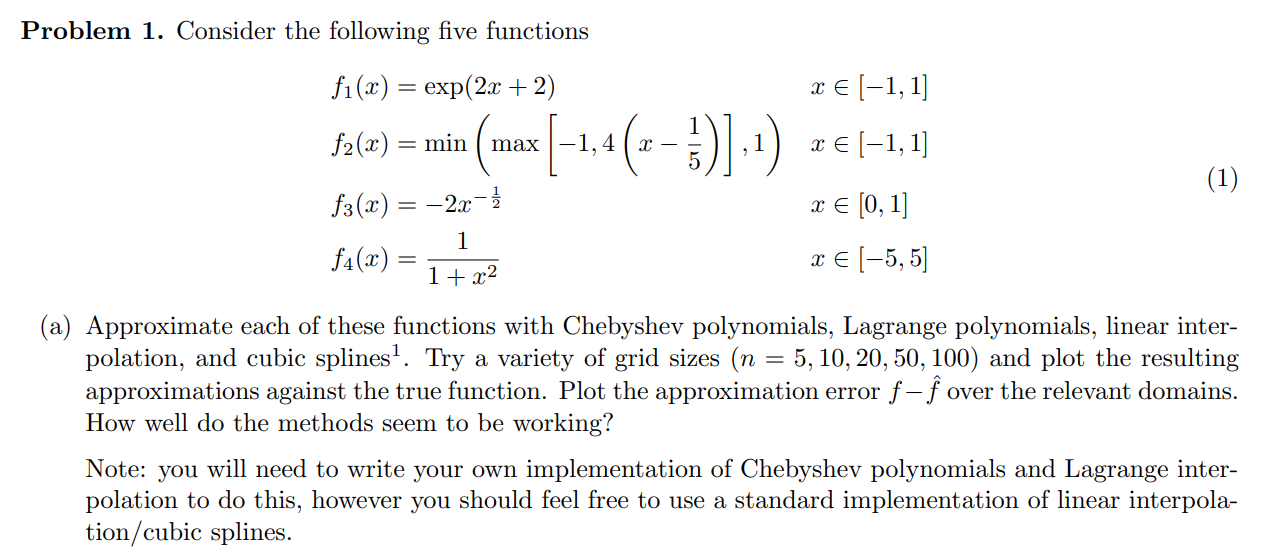

In [3]:
# functions to be approximated (for Chebyshev, linear interpolations, and cubic splines)
def f1(x):
    return np.exp(2*x + 2)
def f2(x):
    return np.minimum(np.maximum(-1, 4*(x-1/5)), 1)
def f3(x):
    return -2 * np.sqrt(x)
def f4(x):
    return 1 / (1 + x**2)

# define a function that plots the Chebyshev approximations, allowing customized lower and upper bounds and grid sizes
def draw_chebyshev(fx, lower, upper, n):
    for val in n:
        # Compute Chebyshev nodes and function values
        x = np.cos(np.pi * np.arange(val + 1) / val)
        y = fx(x)
        
        # Compute Chebyshev coefficients
        c = chebyshev.chebfit(x, y, val)
        
        # Evaluate Chebyshev approximation at some points in the interval [-1, 1]
        xx = np.linspace(lower, upper, 100)
        yy = chebyshev.chebval(xx, c)
        
        # compute the approximation error
        error = np.abs(yy - fx(xx))
        

        # Plot the original function and the Chebyshev polynomial and the approximation error
        plt.plot(xx, fx(xx), label='Original')
        plt.plot(xx, yy, label='Chebyshev approximation')
        plt.plot(xx, error, label=f'n={val} error')
        plt.legend()
        plt.show()

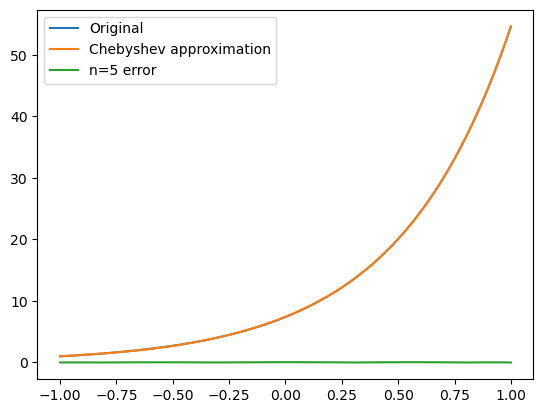

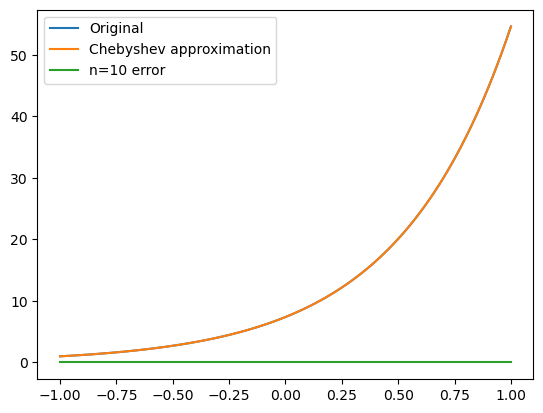

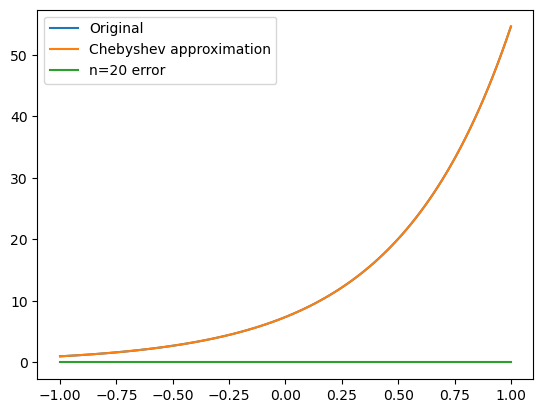

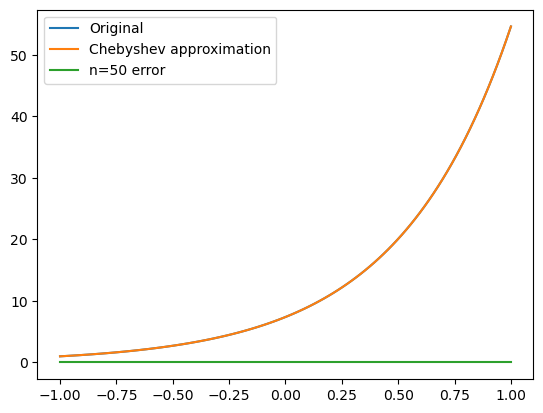

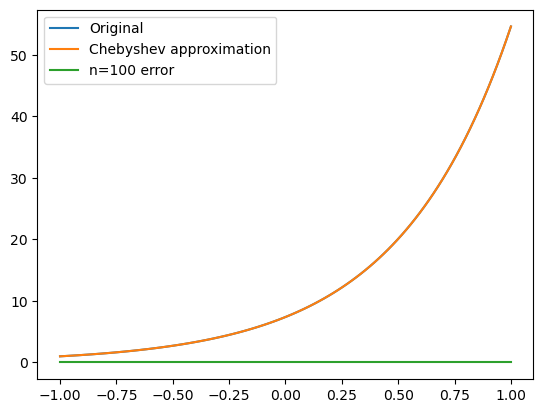

None


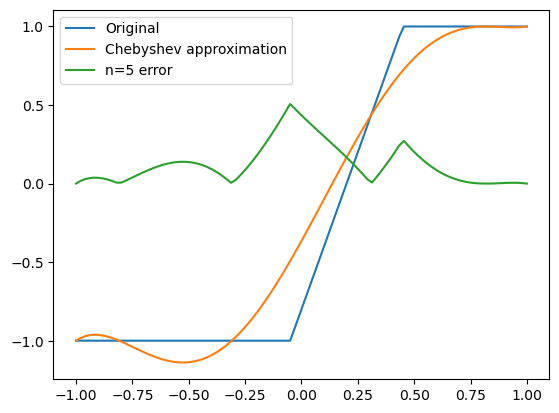

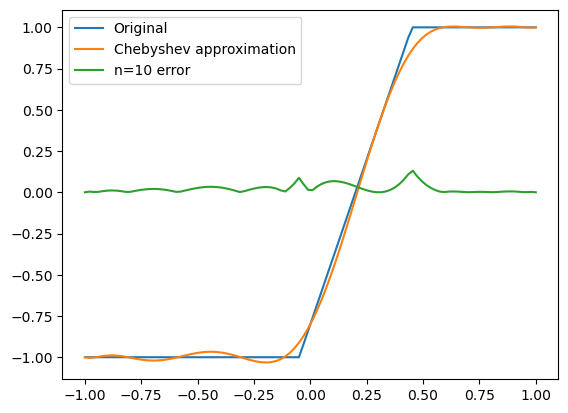

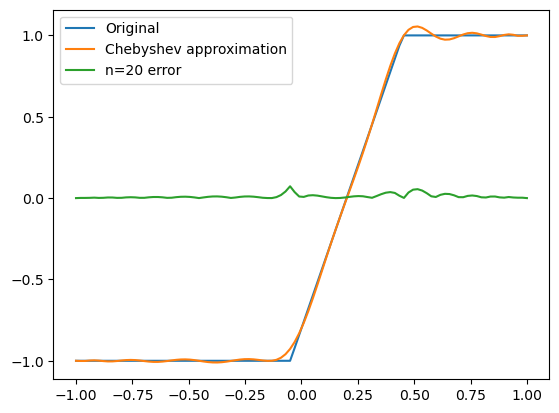

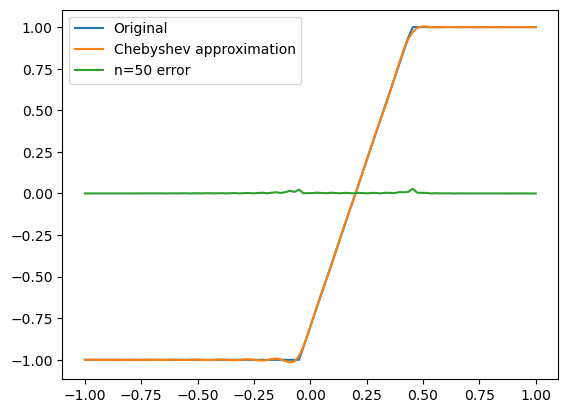

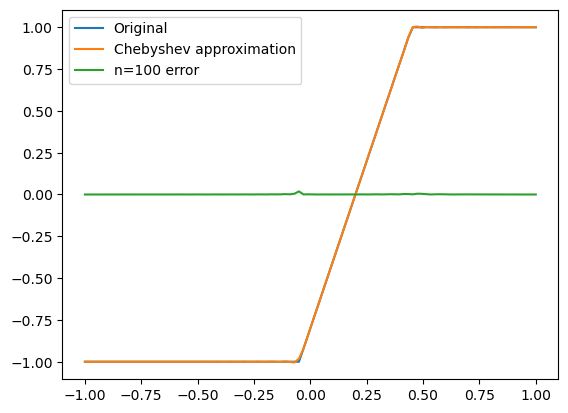

None


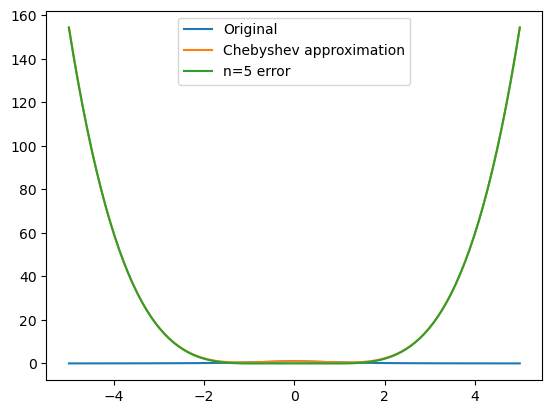

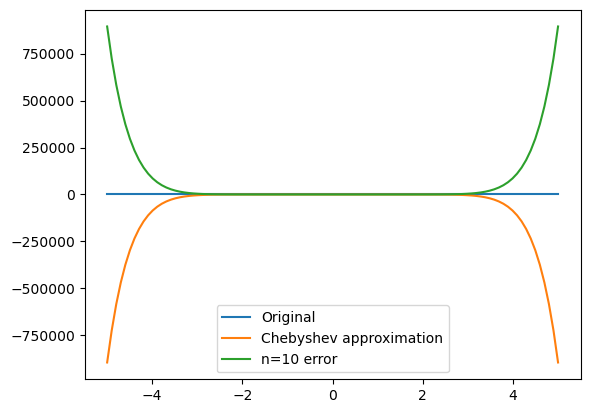

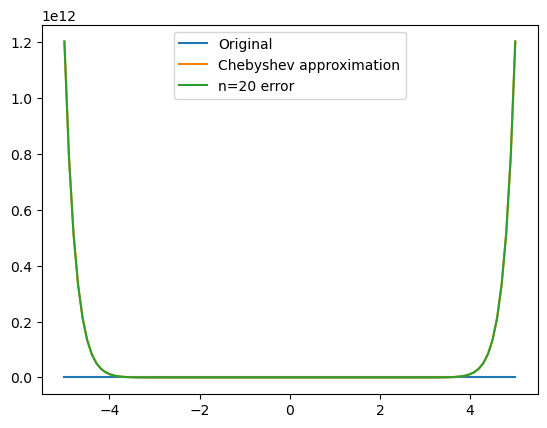

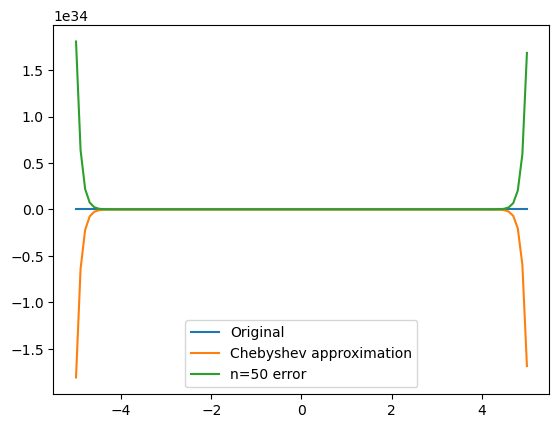

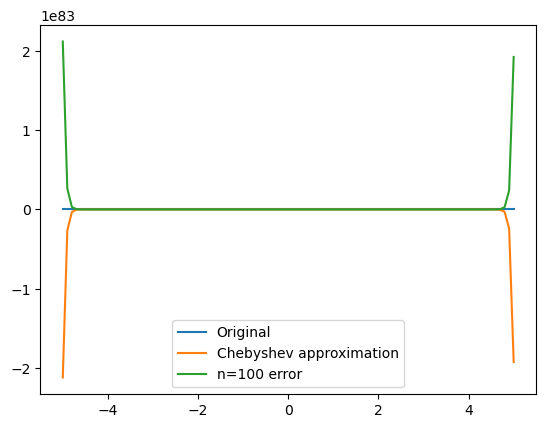

None


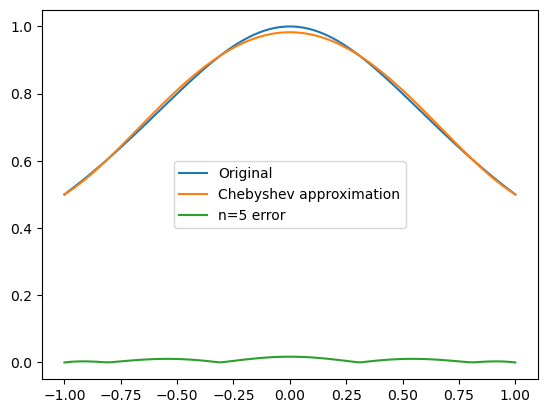

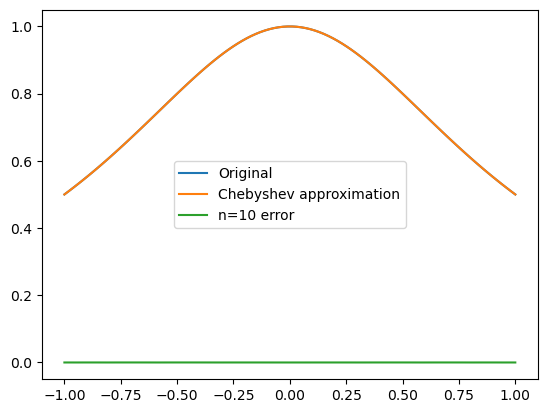

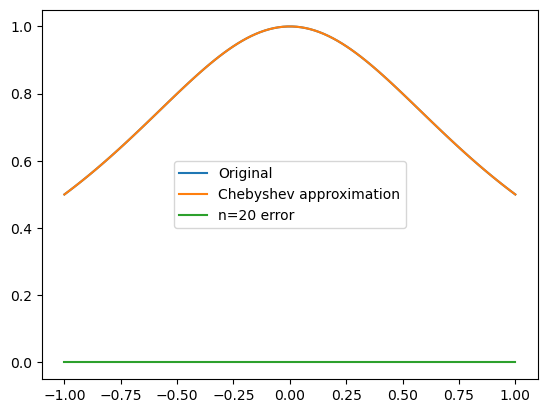

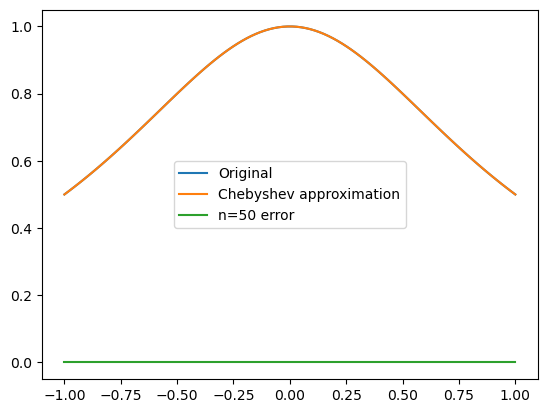

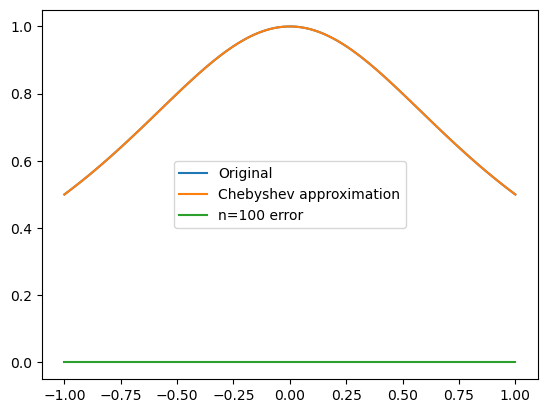

None


In [6]:
# store different values of n in a list
n = [5, 10, 20, 50, 100]

# call the function to plot
print(draw_chebyshev(f1, -1, 1, n))
print(draw_chebyshev(f2, -1, 1, n))
# print(draw_chebyshev(f3, 0, 1, n)) 
# I still need to find a way to show that f3(x) one does not converge and return it without having the console show an error
print(draw_chebyshev(f4, -5, 5, n))
# plot f4(x) but with different bounds
print(draw_chebyshev(f4, -1, 1, n))

The Chebyshev polynomials do pretty well for f1(x) regardless of what value we use for n.
For f2(x) we see that the approximation gets closer to the original function as n gets larger.
I still need to fix f3(x)
f4(x) goes similarly with f2(x). The approximation gets closwer to the orginal as we increase the value of n.However, the errors spike when gets relatively large or small.

In [7]:
# functions to be approximated (for Lagrange)
f1_L = lambda x: np.exp(2*x + 2)
f2_L = lambda x: np.minimum(np.maximum(-1, 4*(x-1/5)), 1)
f3_L = lambda x: -2 * (x)**(-1/2)
f4_L = lambda x: 1 / (1 + x**2)

# the Lagrange basis functions
def lagrange_basis(x, k, x_nodes):
    basis = 1
    for i in range(len(x_nodes)):
        if i != k:
            basis *= (x - x_nodes[i])/(x_nodes[k] - x_nodes[i])
    return basis
# compute the Lagrange polynomial
def lagrange_interpolation(x, x_nodes, y_nodes):
    lagrange_poly = 0
    for k in range(len(x_nodes)):
        lagrange_poly += y_nodes[k]*lagrange_basis(x, k, x_nodes)
    return lagrange_poly

# define a draw function for the Lagrange polynomials
def draw_lagrange(fx, lower, upper, nodes):
    for node in nodes:
        # define the interpolation nodes
        x_nodes = np.linspace(lower, upper, node)
        y_nodes = fx(x_nodes)
        # the x values for plotting the original function and the Lagrange polynomial
        x_vals = np.linspace(lower, upper, 100)
        
        # evaluate the original function and the Lagrange polynomial at the x values
        y_true = fx(x_vals)
        y_interp = lagrange_interpolation(x_vals, x_nodes, y_nodes)
        
        # compute the approximation error
        error = np.abs(y_true - y_interp)

        # plot the original function and the Lagrange polynomial and the error
        plt.plot(x_vals, y_true, label='True function')
        plt.plot(x_vals, y_interp, label='Lagrange polynomial')
        plt.plot(x_nodes, y_nodes, 'ro', label='Interpolation nodes')
        plt.plot(x_vals, error, label=f'n={node} error')
        plt.legend()
        plt.show()

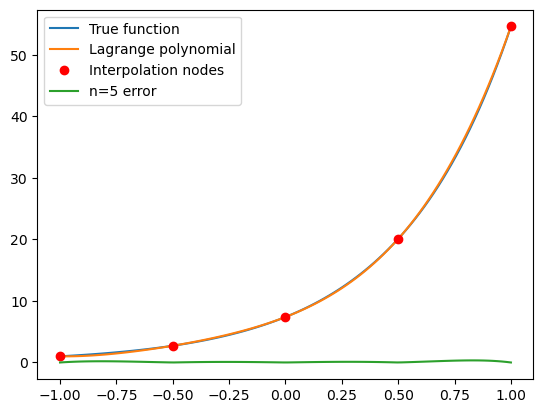

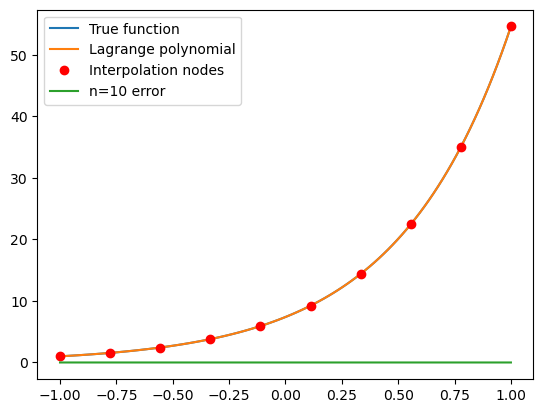

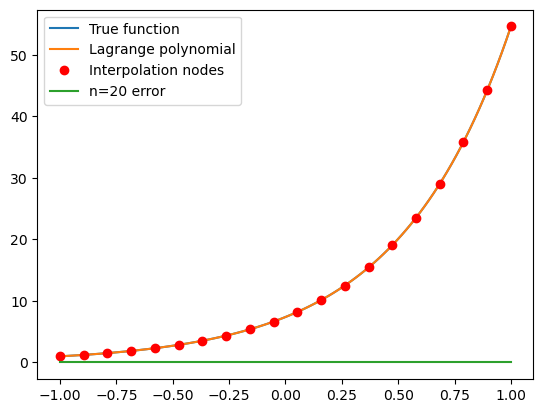

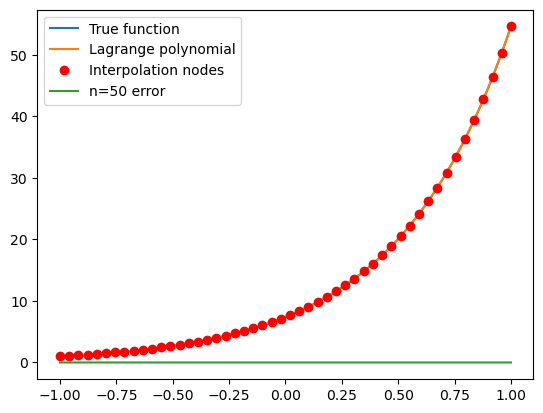

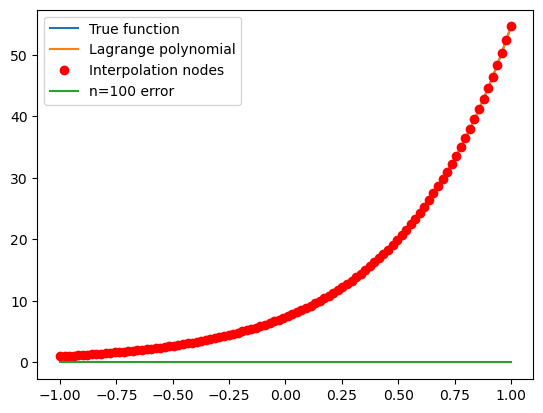

None


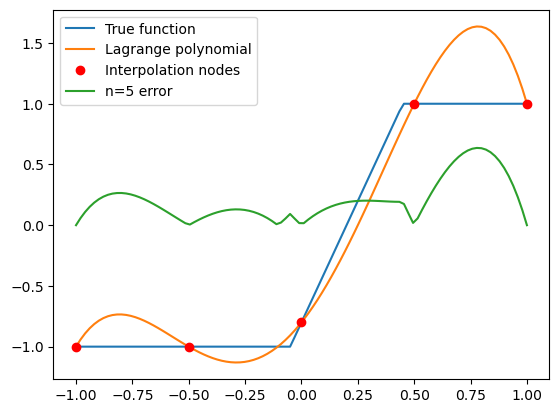

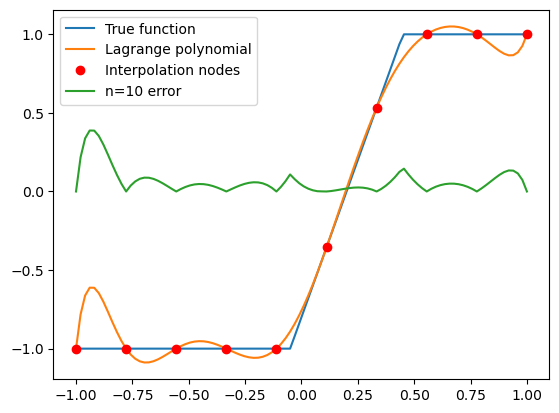

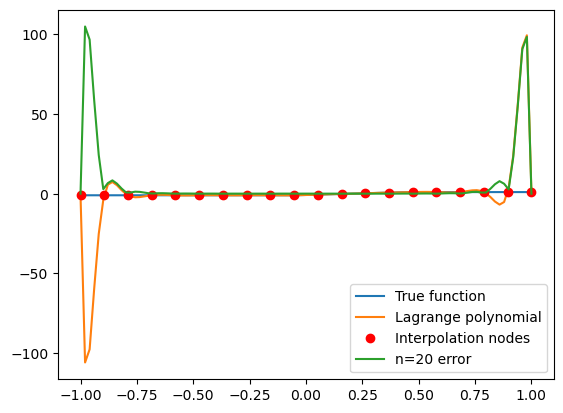

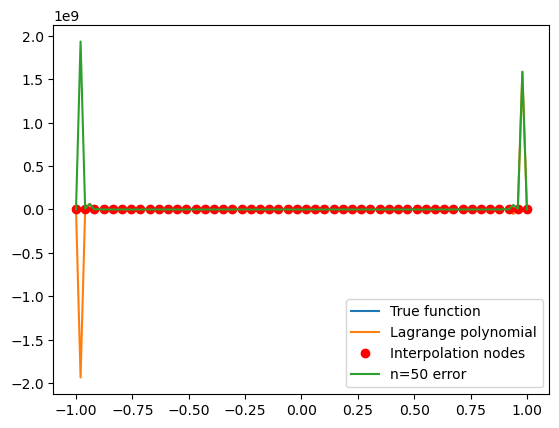

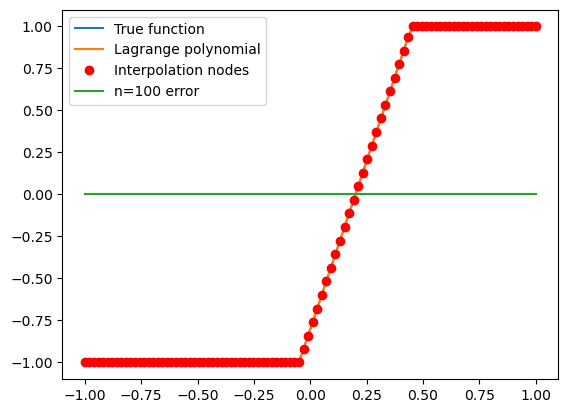

None


C:\Users\HP\AppData\Local\Temp\ipykernel_18364\3957480901.py:4: RuntimeWarning: divide by zero encountered in power
  f3_L = lambda x: -2 * (x)**(-1/2)
C:\Users\HP\AppData\Local\Temp\ipykernel_18364\3957480901.py:18: RuntimeWarning: invalid value encountered in multiply
  lagrange_poly += y_nodes[k]*lagrange_basis(x, k, x_nodes)
C:\Users\HP\AppData\Local\Temp\ipykernel_18364\3957480901.py:35: RuntimeWarning: invalid value encountered in subtract
  error = np.abs(y_true - y_interp)


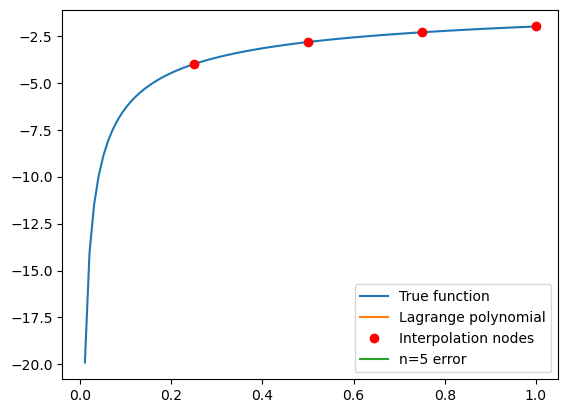

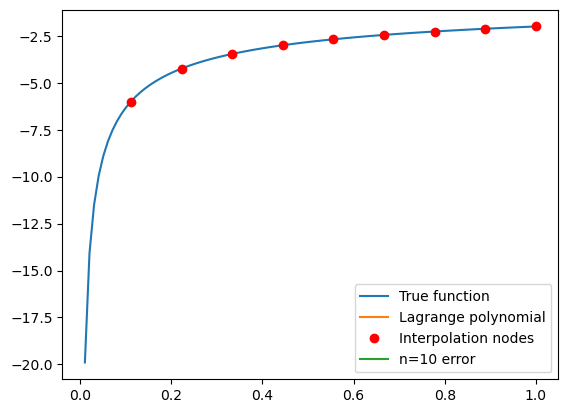

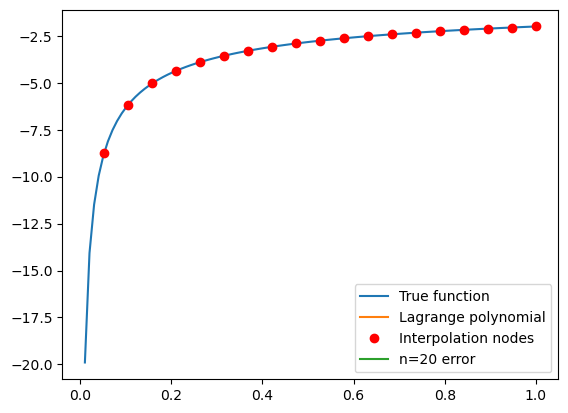

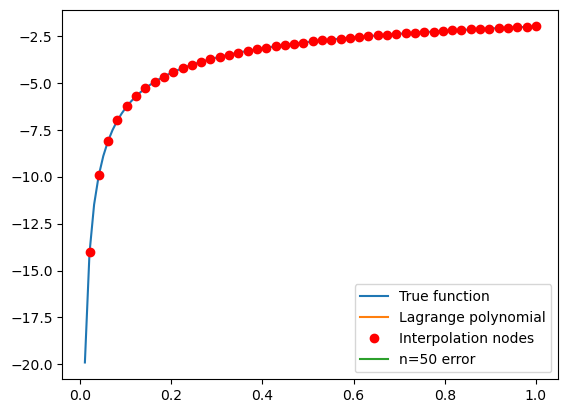

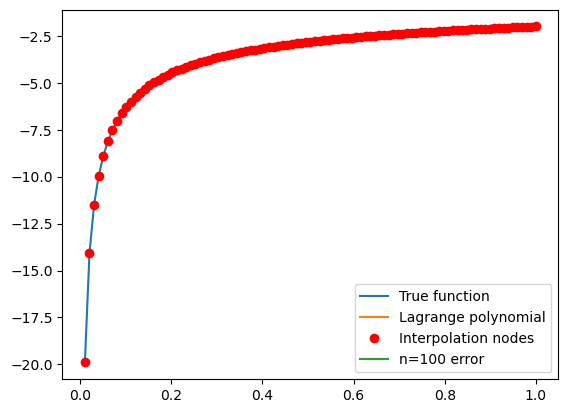

None


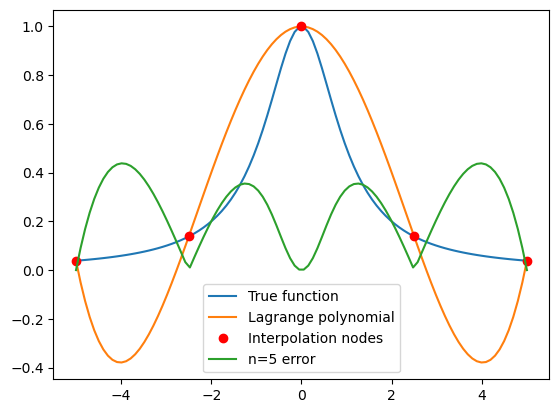

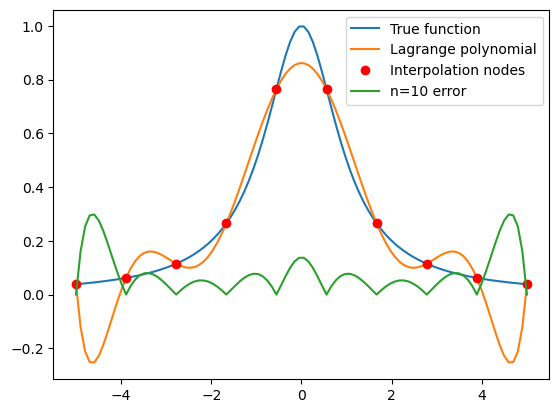

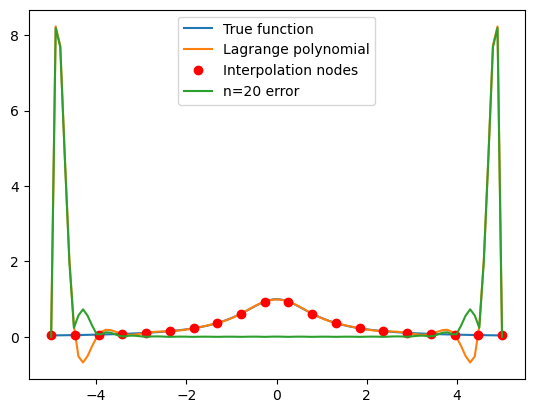

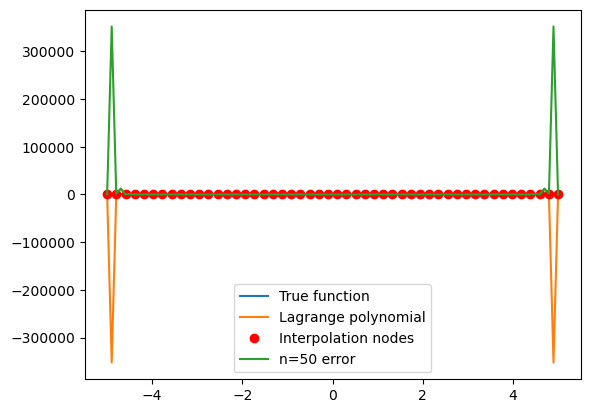

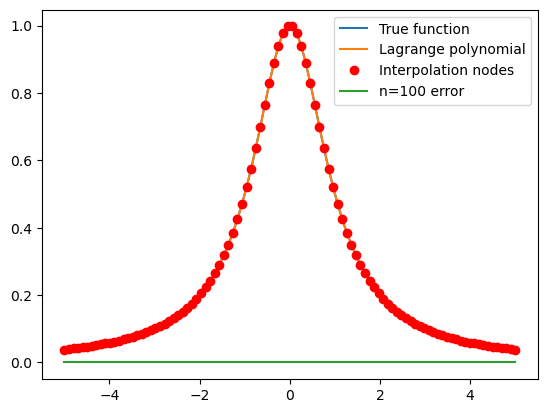

None


In [13]:
# draw the Langrange approximations and the true functions
n = [5, 10, 20, 50, 100]
print(draw_lagrange(f1_L, -1, 1, n))
print(draw_lagrange(f2_L, -1, 1, n))
print(draw_lagrange(f3_L, 0, 1, n))
print(draw_lagrange(f4_L, -5, 5, n))

Lagrange polynomials work well for increasing functions (f1(x) and f3(x)). For f2(x) and f4(x) the approximations are very close to the original functions when n is large (20 and 50), but they go crazy at the edges.However, the errors plunge when n gets to as large as 100.

In [9]:
# define the linear interpolation function
def draw_linear_interpolations(fx, lower, upper, n):
    for val in n:       
        x = np.linspace(lower, upper, val)
        y = fx(x)
        lin_interp = interp1d(x, y)

        # evaluate the linear interpolation function
        xx = np.linspace(lower, upper, 100)
        yy = lin_interp(xx)
        error = np.abs(fx(xx) - yy)
        

        # plot the original function and the linear interpolation and the error
        plt.plot(xx, fx(xx), label='Original')
        plt.plot(xx, yy, label='Linear interpolation')
        plt.plot(x, y, 'ro', label='Interpolation nodes')
        plt.plot(xx, error, label=f'n={val} error')
        plt.legend()
        plt.show()

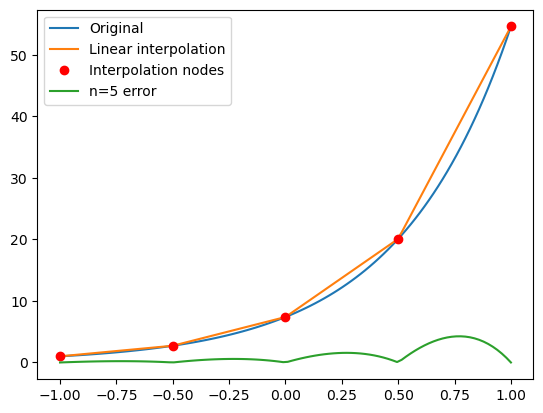

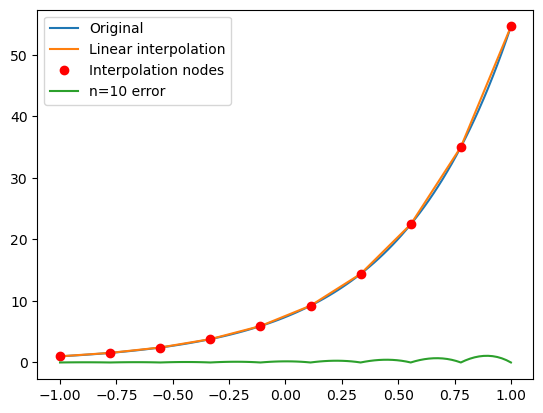

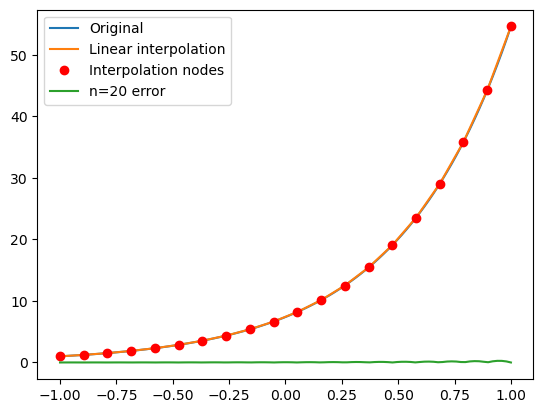

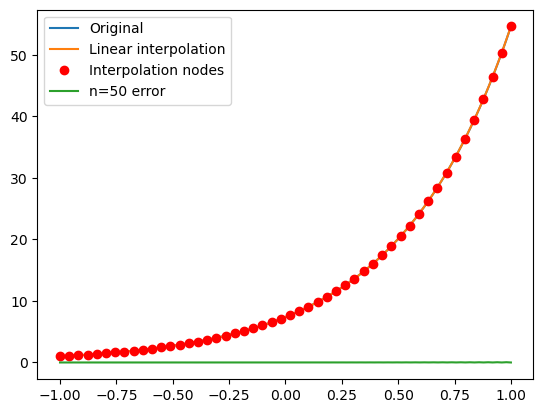

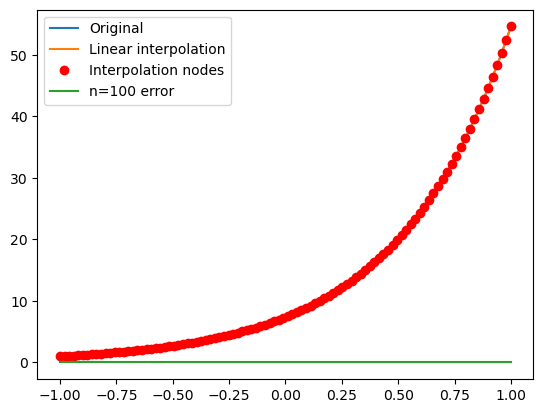

None


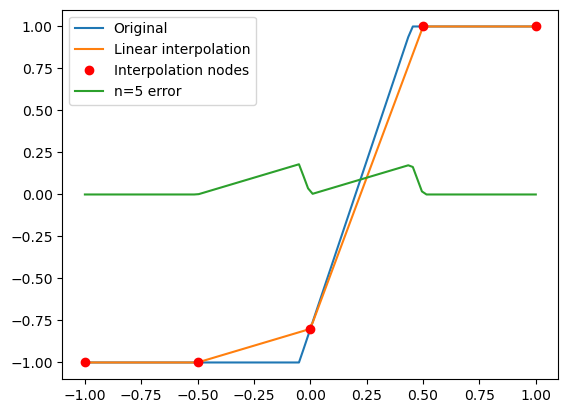

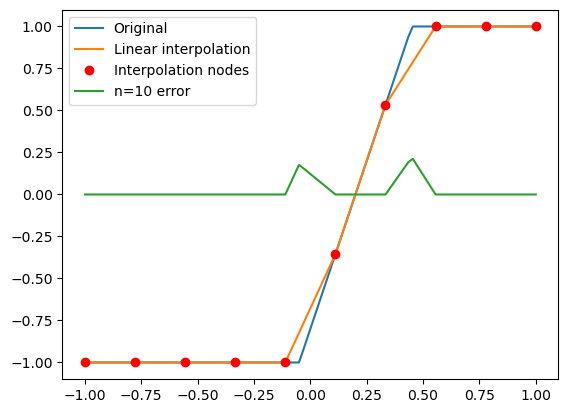

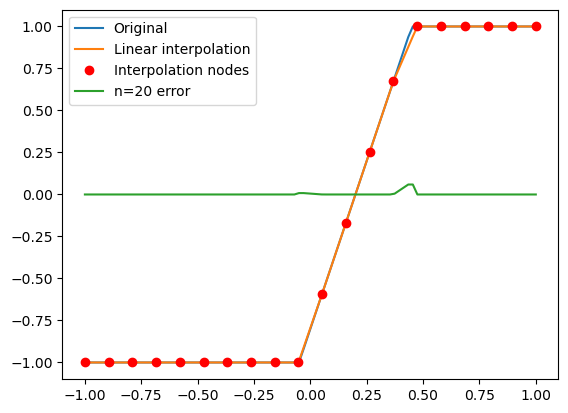

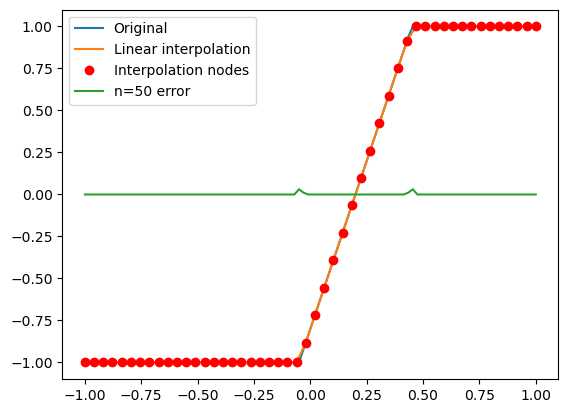

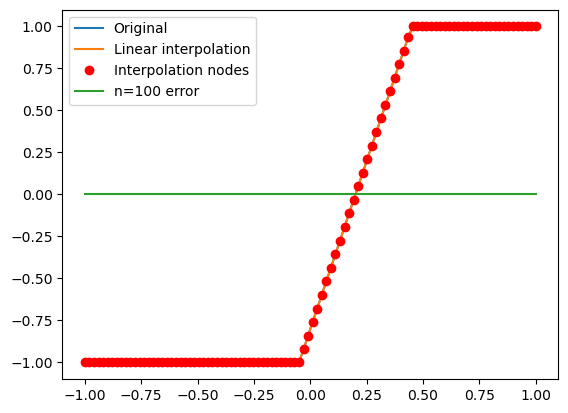

None


C:\Users\HP\AppData\Local\Temp\ipykernel_18364\3957480901.py:4: RuntimeWarning: divide by zero encountered in power
  f3_L = lambda x: -2 * (x)**(-1/2)
C:\Users\HP\AppData\Local\Temp\ipykernel_18364\1332208617.py:11: RuntimeWarning: invalid value encountered in subtract
  error = np.abs(fx(xx) - yy)


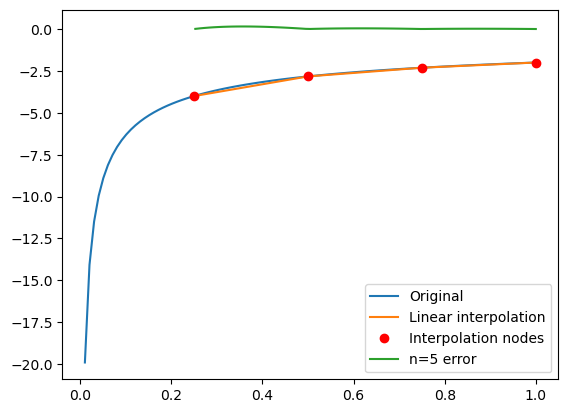

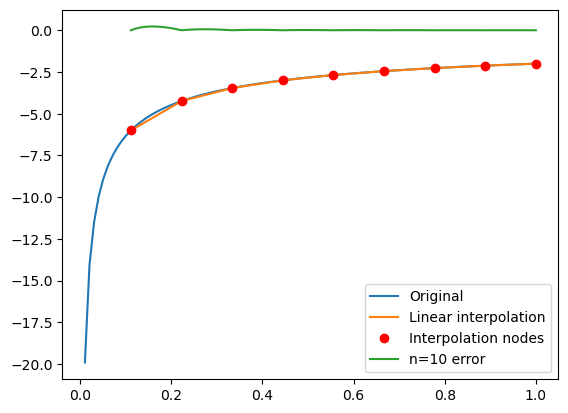

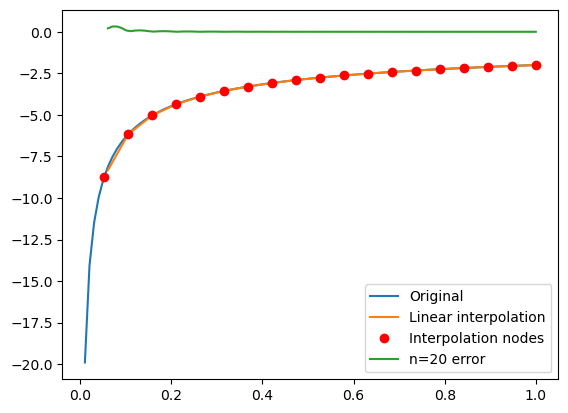

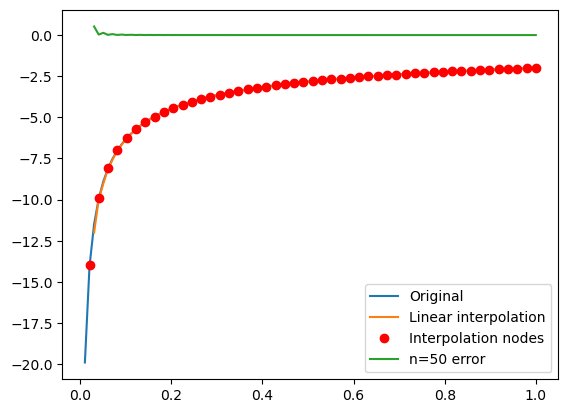

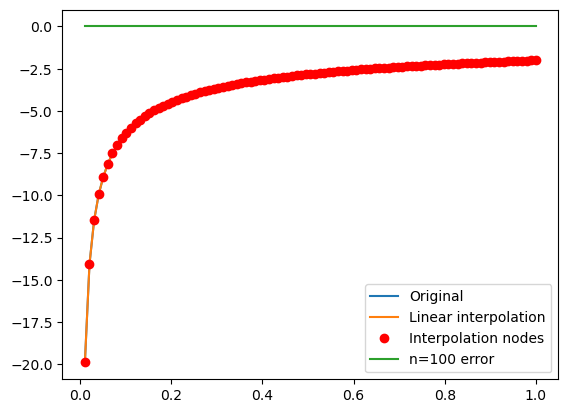

None


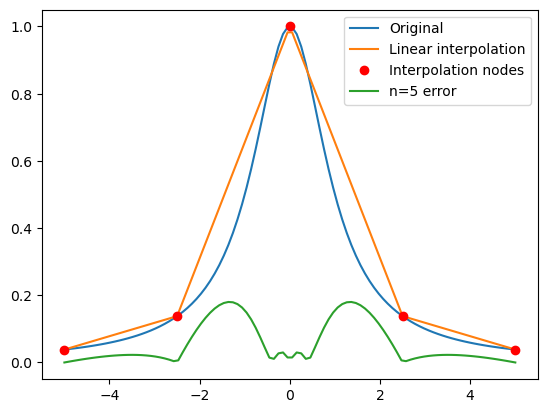

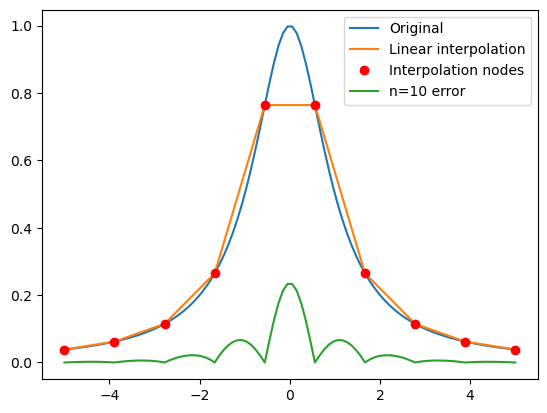

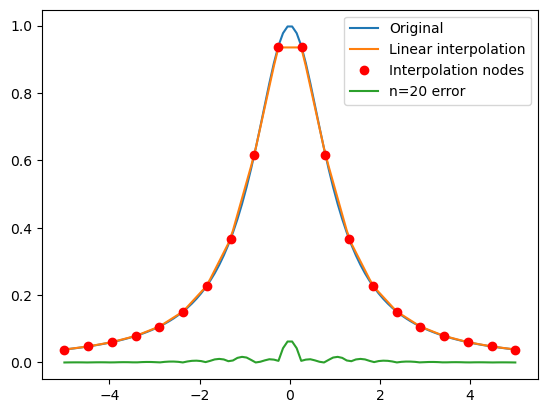

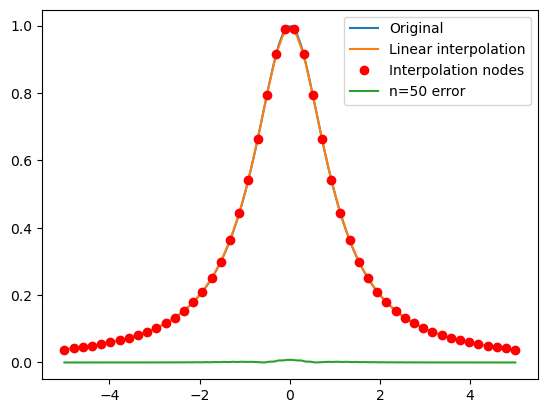

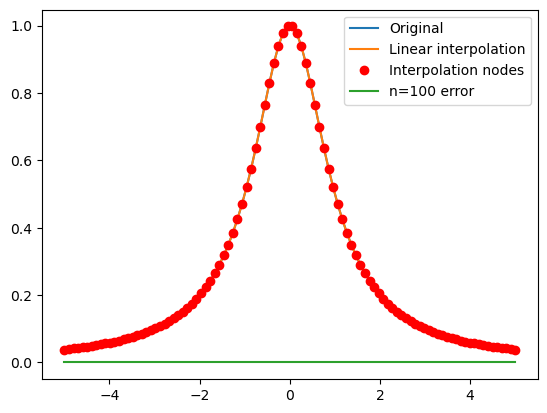

None


In [10]:
# draw the linear interpolation approximations and the true functions
n = [5, 10, 20, 50, 100]
print(draw_linear_interpolations(f1_L, -1, 1, n))
print(draw_linear_interpolations(f2_L, -1, 1, n))
print(draw_linear_interpolations(f3_L, 0, 1, n))
print(draw_linear_interpolations(f4_L, -5, 5, n))

The linear interpolation does well in terms of not going crazy and generating large errors. However, if we have a small n then the approximation may look "flat" because what it does is connecting dots with straight lines. We need a larger n for better approximations with this method.

In [11]:
def draw_cubic_splines(fx, lower, upper, n):
    for val in n:
        # Generate the data points and the function values
        x = np.linspace(lower, upper, val)
        y = fx(x)
        
        # Define the cubic spline function
        cs = interp1d(x, y, kind='cubic')
        
        # Evaluate the cubic spline function at some points in the interval [-1, 1]
        xx = np.linspace(lower, upper, 100)
        yy = cs(xx)
        
        # Calculate the approximation error
        error = np.abs(fx(xx) - yy)
        

        # Plot the original function and the cubic spline approximation and the error
        plt.plot(xx, fx(xx), label='Original')
        plt.plot(xx, yy, label='Cubic spline approximation')
        plt.plot(xx, error, label=f'n={val} error')
        plt.legend()
        plt.show()

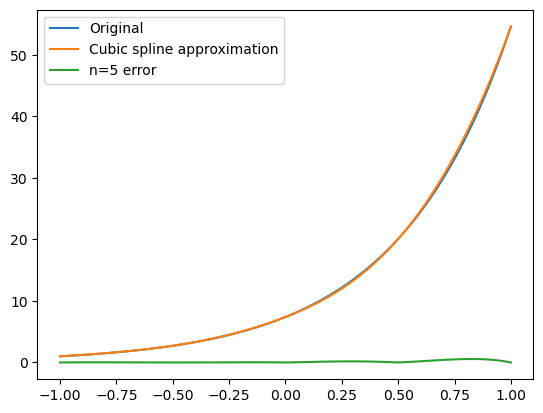

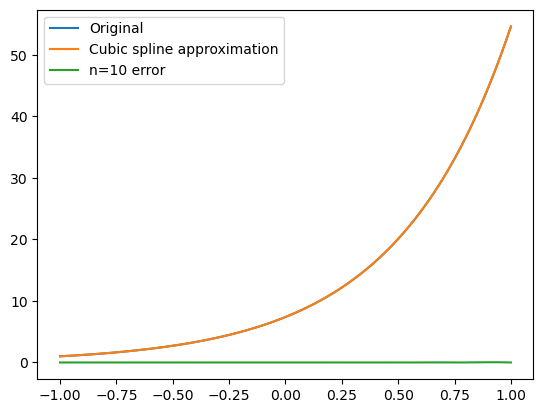

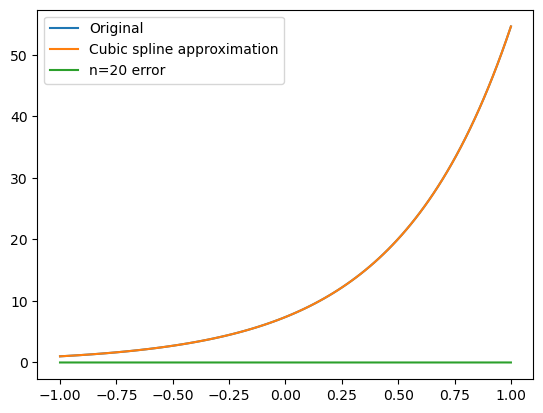

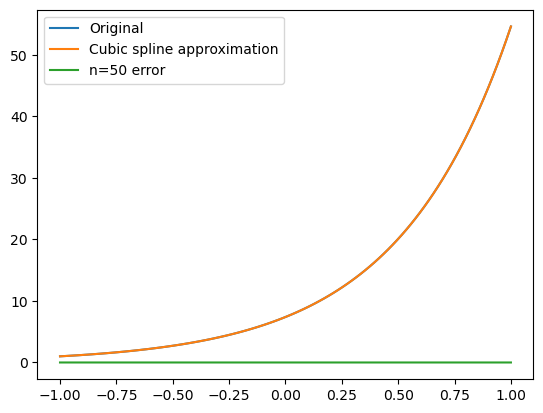

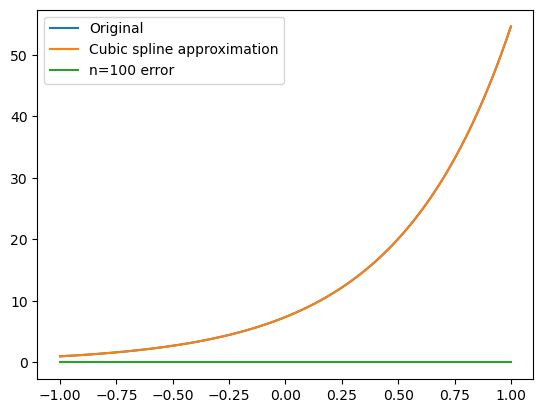

None


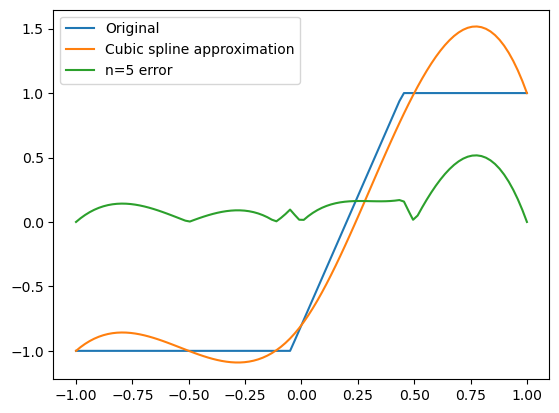

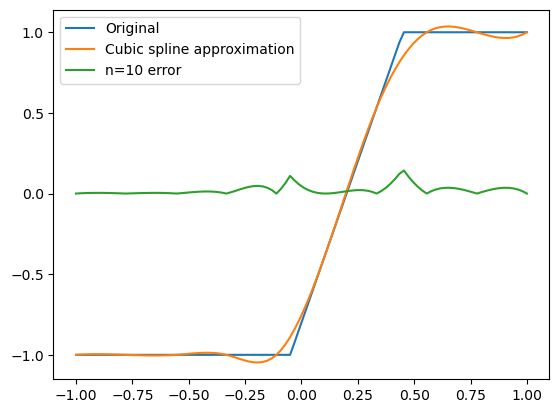

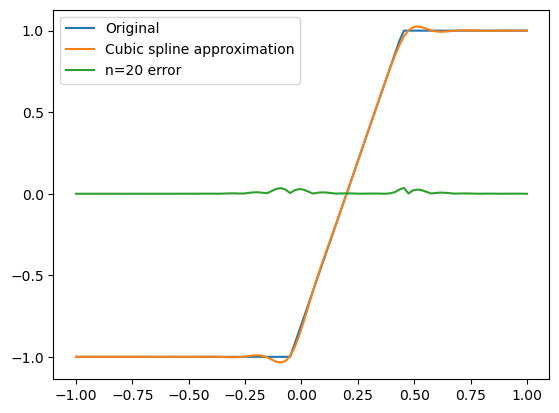

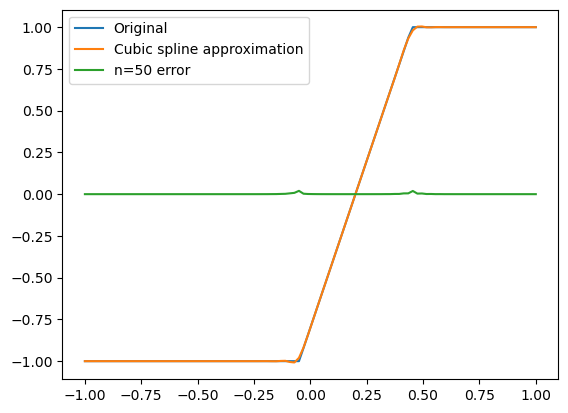

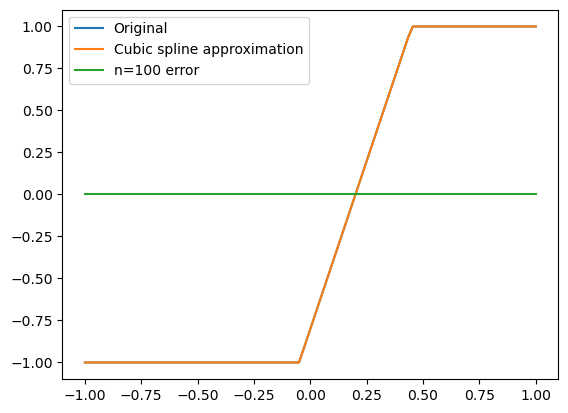

None


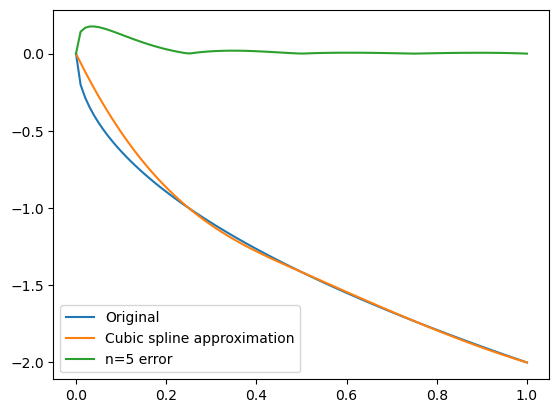

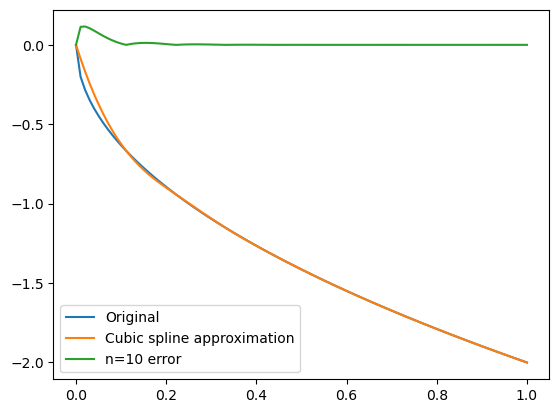

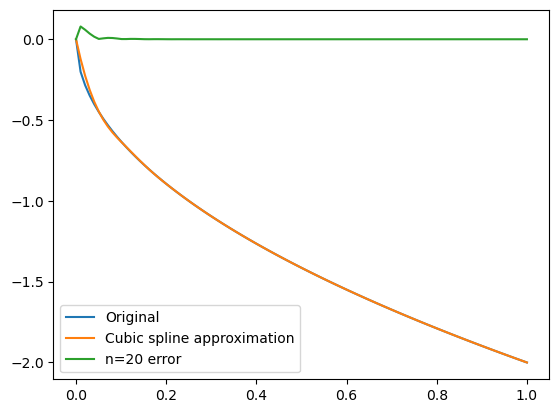

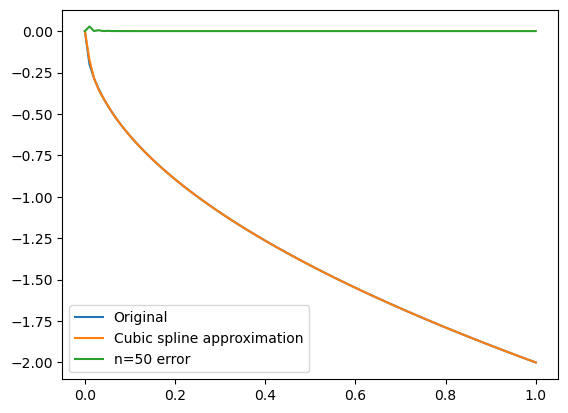

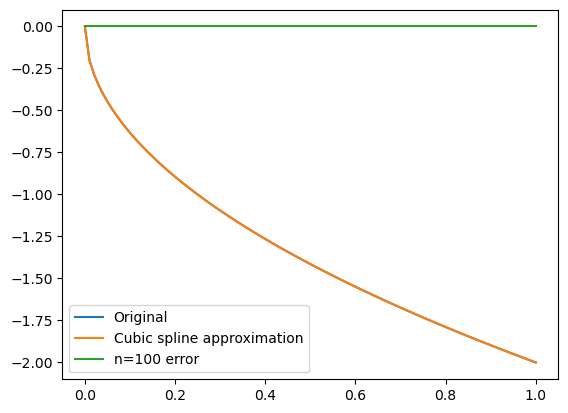

None


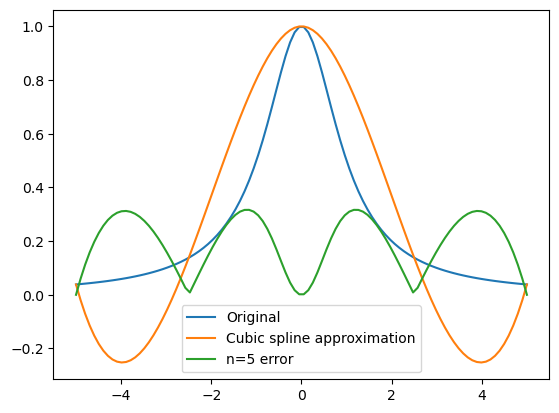

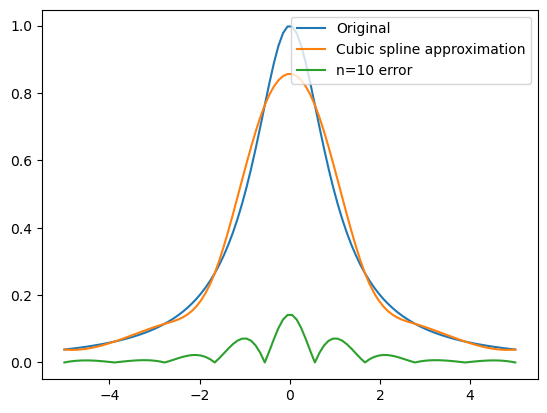

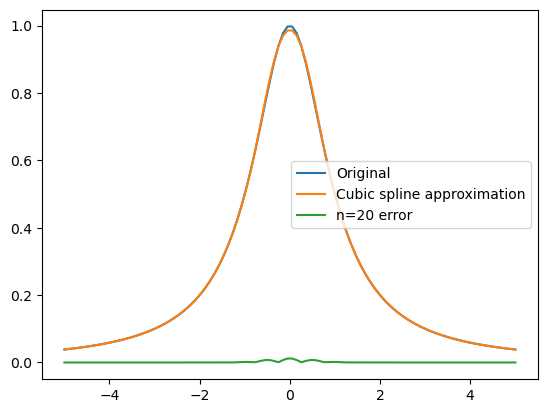

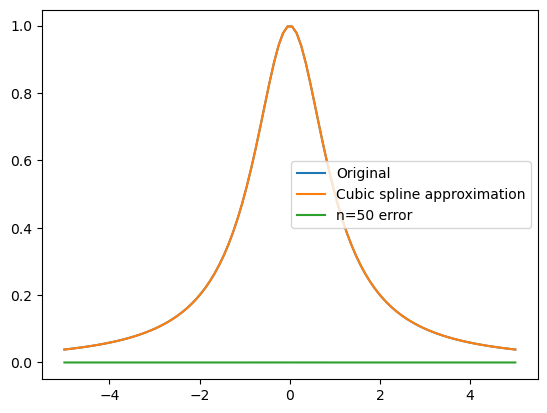

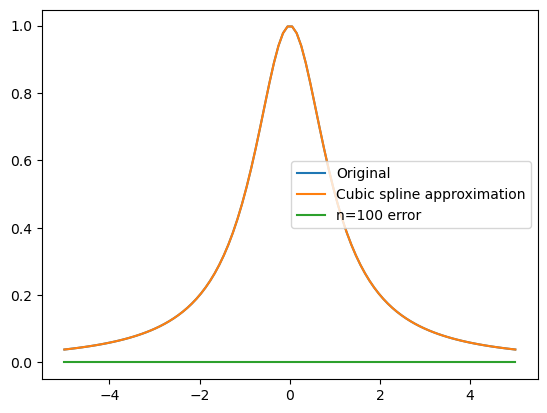

None


In [15]:
# draw the cubic splines approximations and the true functions
n = [5, 10, 20, 50, 100]
print(draw_cubic_splines(f1, -1, 1, n))
print(draw_cubic_splines(f2, -1, 1, n))
print(draw_cubic_splines(f3, 0, 1, n))
print(draw_cubic_splines(f4, -5, 5, n))

Cubic splines would probably be the "smoothiest" method because the errors don't spike at the edges and the approximations get fairly close to the originals if we use a large n. For functions with kinks, cubic splines may not perform as well as linear interpolation because the latter connects up dots and things look more "straight" and linear. If the functions are curvier lines then the former does better in terms of matching up the shape.

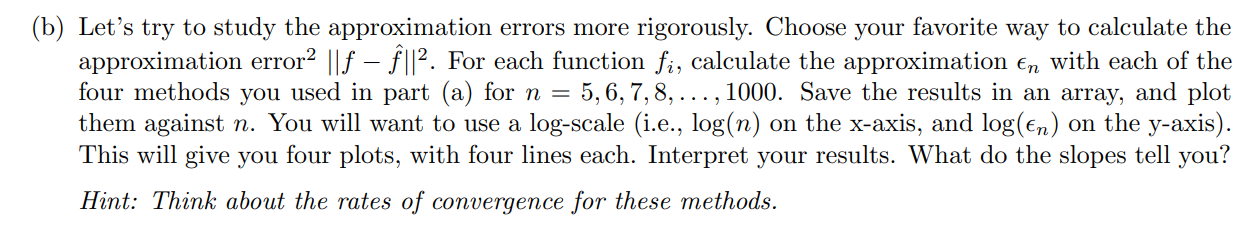

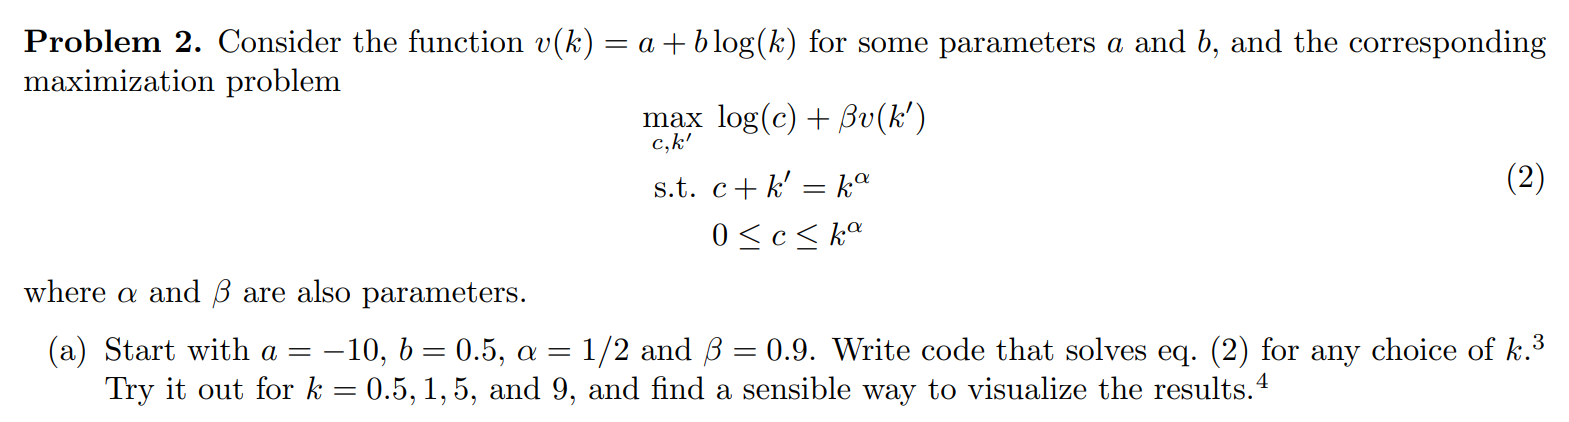

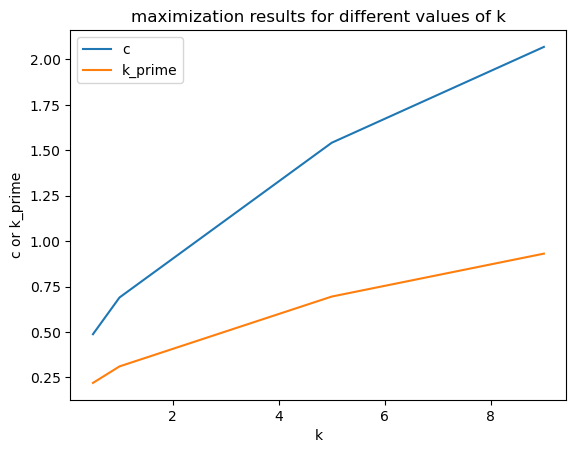

In [16]:
# define the given function
def v(k, a=-10, b=0.5): # start with the given values for a and b
    return a + b*np.log(k)

# define the objective function to be maxmized
def objective(c, k, alpha=1/2, beta=0.9):
    k_prime = k**alpha - c # constraint
    return -np.log(c) - beta*v(k_prime) # make it negative because of "maximization"

# define a function to maximize the objective function
def solve_maximization(k, alpha=1/2):
    bounds = ((0, k**alpha),)
    constraints = [{'type': 'ineq', 'fun': lambda c: k**alpha - c - 10**-8}]
    result = minimize(objective, k**alpha/2, args=(k,), bounds=bounds, constraints=constraints)
    c = result.x[0]
    k_prime = k**alpha - c
    return c, k_prime

# create a list of values of k to try out
k_values = [0.5, 1, 5, 9]
# create empty lists for a and k' to store results
c_values = []
k_prime_values = []

# plug in different values of k into the maximization function and store results
for k in k_values:
    c, k_prime = solve_maximization(k)
    c_values.append(c)
    k_prime_values.append(k_prime)

# print and plot the results
plt.plot(k_values, c_values, label='c')
plt.plot(k_values, k_prime_values, label='k_prime')
plt.xlabel('k')
plt.ylabel('c or k_prime')
plt.title('maximization results for different values of k')
plt.legend()
plt.show()

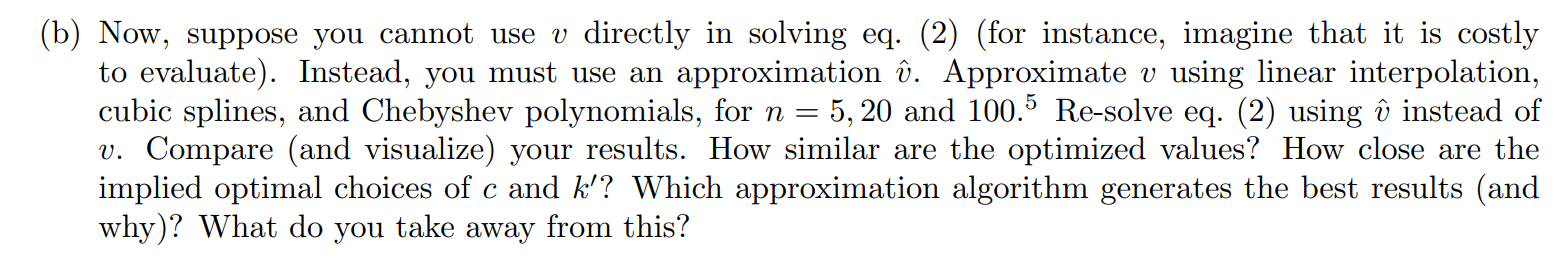

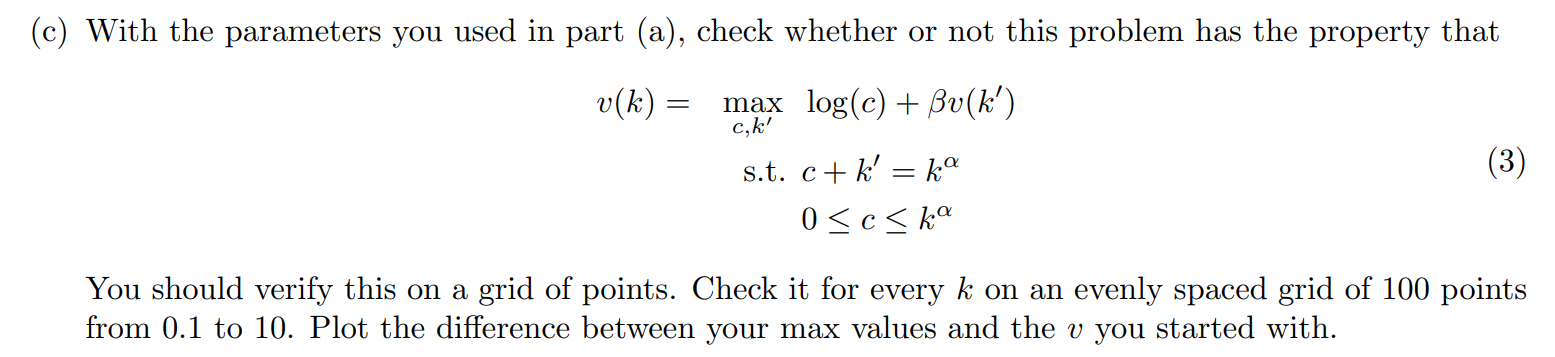

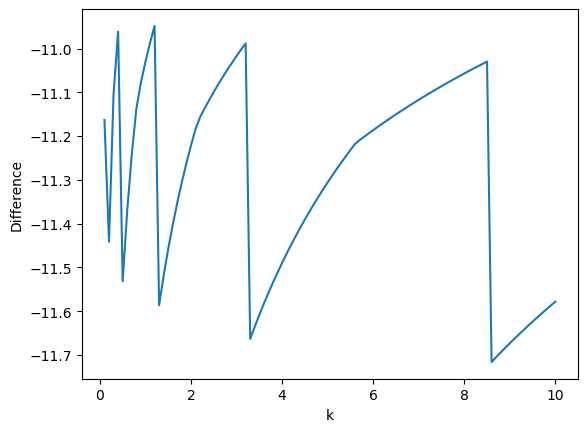

The differences between the original function and the optimal values are not zeros, so the problem does not have the property.


In [20]:
# define the function v(k)
def v(k, a=-10, b=0.5):
    return a + b * np.log(k)

# define the problem
def opt_func(k, alpha=0.5, beta=0.9):
    # define the objective function
    def objective(c):
        return np.log(c) + beta * v(k=(k**alpha - c)**(1/alpha))
    # set the bounds and find the result
    bounds = (0, k**alpha)
    res = minimize_scalar(objective, bounds=bounds, method='bounded')
    return res.fun, res.x, k**alpha - res.x

# evaluate the optimization problem on a grid of k values
k_values = np.linspace(0.1, 10, 100)
diff_values = []
for k in k_values:
    v_k = v(k)
    opt_value, opt_c, opt_k = opt_func(k)
    diff = opt_value - v_k
    diff_values.append(diff)

# plot the differences
import matplotlib.pyplot as plt
plt.plot(k_values, diff_values)
plt.xlabel('k')
plt.ylabel('Difference')
plt.show()


print("The differences between the original function and the optimal values are not zeros, so the problem does not have the property.")

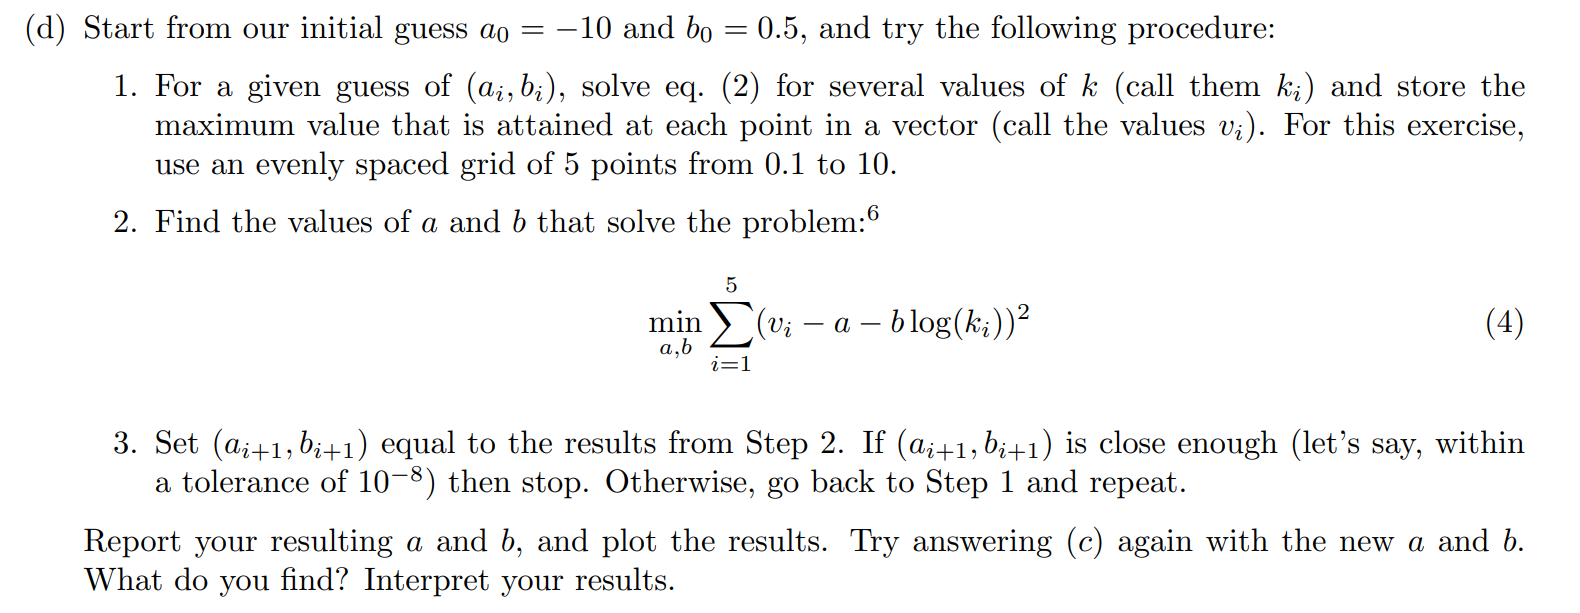

a = -12.511598287752461
b = 0.9090902485962635


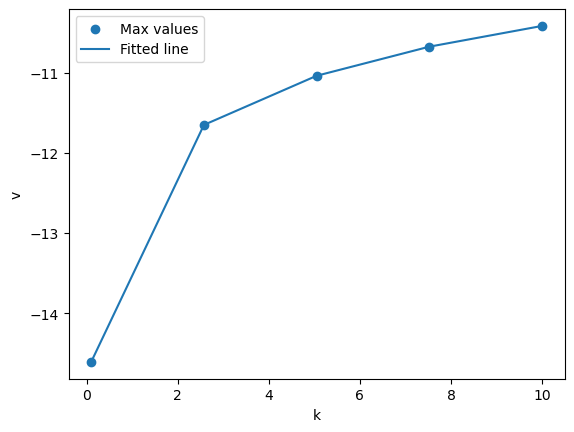

The resulting a and b are -12.511598287752461 and 0.9090902485962635 respectively. They are different from the initial guesses.


In [21]:
# define the function v(k)
def v(k, a, b):
    return a + b * np.log(k)

# set the parameters and the tolerance for convergence
alpha = 0.5
beta = 0.9
k_values = np.linspace(0.1, 10, 5)
tol = 1e-8

# initial guesses
a = -10
b = 0.5

# iterate until convergence
while True:
    # step 1: solve the optimization problem for each k
    vi_values = []
    for k in k_values:
        obj_func = lambda c: -np.log(c) - beta * v(k**(alpha) - c, a, b)
        bounds = (0, k**alpha)
        result = minimize_scalar(obj_func, bounds=bounds, method='bounded')
        vi = -obj_func(result.x)
        vi_values.append(vi)

    # step 2: find the values of a and b that minimize the sum of squared differences
    def loss_func(params):
        a, b = params
        return np.sum((vi_values - (a + b * np.log(k_values)))**2)

    result = minimize(loss_func, [a, b])
    a_new, b_new = result.x

    # step 3: sheck for convergence and stop if close enough otherwise back to step 1
    if np.sqrt((a_new - a)**2 + (b_new - b)**2) < tol:
        break
    else:
        a, b = a_new, b_new

# new values for a and b
print('a =', a_new)
print('b =', b_new)

# plot the results
plt.scatter(k_values, vi_values, label='Max values')
plt.plot(k_values, a_new + b_new * np.log(k_values), label='Fitted line')
plt.xlabel('k')
plt.ylabel('v')
plt.legend()
plt.show()

# report
print("The resulting a and b are", a_new, "and", b_new, "respectively. They are different from the initial guesses.")